<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 23

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* This simple tutorial is still based on a script I created for this article: https://imechanica.org/node/23957
* It follows from some examples provided by the scikit-learn user guide, which seem to have originated from Mathieu Blondel, Jake Vanderplas, Vincent Dubourg, and Jan Hendrik Metzen.

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
        ```
        git reset --hard origin/main
        ```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## Outline for today

* Short introduction about using Keras for regression with Artificial Neural Networks

**Reading material**: This notebook + (ANNs in Chapter 13)

## Installing a new package

There is one simple package missing from our '3dasm' environment that we still need to install by typing the following commands in the appropriate command window:

```
mamba activate 3dasm
pip install scikeras
mamba deactivate
```

* We will train a very simple ANN that will try to learn the function $x \sin{x}$ using:
    -  [keras](https://keras.io/) and [tensorflow](https://www.tensorflow.org/)

In [2]:
from sklearn.model_selection import train_test_split

# Function to "learn"
def f(x):
    return x * np.sin(x)

n_data = 50 # number of points in our dataset
testset_ratio = 0.10 # ratio of test set points from the dataset
x_data = np.linspace(0, 10, n_data) # uniformly spaced points
y_data = f(x_data) # function values at x_data

X_data = np.reshape(x_data,(-1,1)) # a 2D array that scikit-learn likes

seed = 1987 # set a random seed so that everyone gets the same result
np.random.seed(seed)

# Let's split into 10% training points and the rest for testing:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                    y_data, test_size=testset_ratio,
                                    random_state=seed)

x_train = X_train.ravel() # just for plotting later
x_test = X_test.ravel() # just for plotting later

print("Here's a print of X_train:\n", X_train)

Here's a print of X_train:
 [[ 4.48979592]
 [ 0.40816327]
 [ 1.63265306]
 [ 9.3877551 ]
 [ 6.73469388]
 [ 8.7755102 ]
 [ 4.89795918]
 [ 9.79591837]
 [ 5.91836735]
 [ 9.59183673]
 [ 5.30612245]
 [ 3.06122449]
 [ 9.18367347]
 [ 8.16326531]
 [ 7.34693878]
 [ 0.        ]
 [ 7.55102041]
 [ 2.24489796]
 [ 3.67346939]
 [10.        ]
 [ 1.02040816]
 [ 6.53061224]
 [ 5.71428571]
 [ 2.65306122]
 [ 0.20408163]
 [ 1.83673469]
 [ 5.51020408]
 [ 0.6122449 ]
 [ 6.32653061]
 [ 0.81632653]
 [ 4.69387755]
 [ 3.26530612]
 [ 4.08163265]
 [ 4.28571429]
 [ 3.46938776]
 [ 1.42857143]
 [ 7.95918367]
 [ 5.10204082]
 [ 2.04081633]
 [ 1.2244898 ]
 [ 6.12244898]
 [ 8.57142857]
 [ 7.14285714]
 [ 2.85714286]
 [ 8.97959184]]


In [3]:
# Now let's also create the noisy dataset:
random_std = 0.5 + 1.0 * np.random.random(y_data.shape) # np.random.random returns random number between [0.0, 1.0)
noise = np.random.normal(0, random_std) # sample vector from Gaussians with random standard deviation
y_noisy_data = y_data + noise # Perturb every y_data point with Gaussian noise

# Pair up points with their associated noise level (because of train_test_split):
Y_noisy_data = np.column_stack((y_noisy_data,noise))

# Split into 10% training points and the rest for testing:
X_train, X_test, Y_noisy_train, Y_noisy_test = train_test_split(X_data,
                                    Y_noisy_data, test_size=testset_ratio,
                                    random_state=seed) # "noisy_train" is a great name for a variable, hein?
# NOTE: since we are using the same seed and we do train_test_split on the same X_data and since y_noisy_data
#       is just y_data + noise, we are splitting the dataset exactly in the same way! This is nice because we
#       want to keep the comparison as fair as possible.

# Finally, for plotting purposes, let's convert the 2D arrays into 1D arrays (vectors):
x_train = X_train.ravel()
x_test = X_test.ravel()
y_noisy_train = Y_noisy_train[:,0]
noise_train = Y_noisy_train[:,1]
y_noisy_test = Y_noisy_test[:,0]
noise_test = Y_noisy_test[:,1]

print("Note that X_train and X_test are the same data that we used for the noiseless case.")
print("Here's a print of X_train:\n", X_train)

Note that X_train and X_test are the same data that we used for the noiseless case.
Here's a print of X_train:
 [[ 4.48979592]
 [ 0.40816327]
 [ 1.63265306]
 [ 9.3877551 ]
 [ 6.73469388]
 [ 8.7755102 ]
 [ 4.89795918]
 [ 9.79591837]
 [ 5.91836735]
 [ 9.59183673]
 [ 5.30612245]
 [ 3.06122449]
 [ 9.18367347]
 [ 8.16326531]
 [ 7.34693878]
 [ 0.        ]
 [ 7.55102041]
 [ 2.24489796]
 [ 3.67346939]
 [10.        ]
 [ 1.02040816]
 [ 6.53061224]
 [ 5.71428571]
 [ 2.65306122]
 [ 0.20408163]
 [ 1.83673469]
 [ 5.51020408]
 [ 0.6122449 ]
 [ 6.32653061]
 [ 0.81632653]
 [ 4.69387755]
 [ 3.26530612]
 [ 4.08163265]
 [ 4.28571429]
 [ 3.46938776]
 [ 1.42857143]
 [ 7.95918367]
 [ 5.10204082]
 [ 2.04081633]
 [ 1.2244898 ]
 [ 6.12244898]
 [ 8.57142857]
 [ 7.14285714]
 [ 2.85714286]
 [ 8.97959184]]


Draw (again!) a schematic so that you understand the number of parameters that starts appearing!

* Draw on the board a feedforward ANN with 2 hidden layers for 1D case.
    * First hidden layer with 3 neurons and second hidden layer with 2 neurons.

Two examples of nonlinear activation functions $f_l$ for a layer $l$.


<div>
<img style="float: left"; src=../figures/nonlin_fn.png width=500px></div>

Let's now focus on how to create an ANN model for 1D regression using:
1. A feedforward architecture with 2 dense hidden layers
2. The ReLu activation function
3. Adam optimizer

In [4]:
# Let's create a function defining our Artificial Neural Network.
from tensorflow import keras # fast library for ANNs
from tensorflow.keras.optimizers import Adam # import the optimizer you want to use to calculate the parameters
from keras.models import Sequential # to create a feedforward neural network
from keras.layers import Dense # to create a feedforward neural network with dense layers
#
# Function to create the ANN model (in this case we are creating )
def create_ANN(input_dimensions=1, # number of input variables
               neurons1=3, # number of neurons in first hidden layer
               neurons2=2, # number of neurons in second hidden layer
               activation='relu', # activation function
               optimizer='adam', # optimization algorithm to compute the weights and biases
               output_dimensions=1): # number of output variables
    # create model
    model = Sequential() # Feedforward architecture
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    model.add(Dense(output_dimensions, activation='linear')) # output layer using Linear activation function because
                                                             # we are doing regression (we could also ommit the
                                                             # activation='linear' command because keras
                                                             # would pick the right activation function
                                                             # when we ask for the correct loss below)
    model.compile(loss='mse', # our NLL (loss or error function)
                  optimizer=optimizer)
    return model

2023-11-10 17:33:04.666418: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 17:33:05.186409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


As usual, before training an ML model, we start by preprocessing the dataset!

As mentioned previously, standardizing our dataset is good practice and can be important for many ML algorithms (ANNs included).

In [5]:
# Standardizing your dataset is good practice and can be important for ANNs!
from sklearn.preprocessing import StandardScaler # standardize the dataset with scikit-learn
#
scaler = StandardScaler().fit(X_train) # Check scikit-learn to see what this does!
#
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_data_scaled=scaler.transform(X_data)
#

And now let's create an ANN model with:
* 3 neurons in the 1st hidden layer
* 2 neurons in the 2nd hidden layer
* ReLu activation function in both hidden layers (not usually a good choice for regression problems; why?)
* Adam optimizer (for now, you don't need to know what kind of optimization algorithm this is!)
* Batch size being the entire size of the dataset (explain in class what is the batch size)
* 150 Epochs (explain in class what are "epochs")

In [22]:
import scikeras
from scikeras.wrappers import KerasRegressor
#from tensorflow.keras import KerasRegressor # a new version will use scikeras
# Now create your first ANN model!
neurons1=100 # number of neurons for the first hidden layer
neurons2=100 # number of neurons for the second hidden layer
activation='tanh' # choose activation function
batch_size = len(X_train) # considering the entire dataset for updating the weights and biases in each epoch
epochs = 1500 # number of times we train the neural network with the entire training set
optimizer = Adam(learning_rate=0.001) # specifying the learning rate value for the optimizer (PLAY WITH THIS!)
ANN_model = KerasRegressor(model=create_ANN, neurons1=neurons1, neurons2=neurons2,
                           activation=activation, batch_size=batch_size, epochs=epochs,
                           optimizer=optimizer)

In [23]:
# Now that we created our first ANN model, let's fit it to our (scaled) dataset!
history = ANN_model.fit(X_train_scaled, y_train, validation_data=(scaler.transform(X_test), y_test))

Epoch 1/1500
1/1 [==============================] - 1s 691ms/step - loss: 12.5484 - val_loss: 24.6992
Epoch 2/1500
1/1 [==============================] - 0s 24ms/step - loss: 12.4526 - val_loss: 23.5879
Epoch 3/1500
1/1 [==============================] - 0s 26ms/step - loss: 12.4024 - val_loss: 22.6342
Epoch 4/1500
1/1 [==============================] - 0s 27ms/step - loss: 12.3898 - val_loss: 21.9485
Epoch 5/1500
1/1 [==============================] - 0s 25ms/step - loss: 12.3943 - val_loss: 21.5714
Epoch 6/1500
1/1 [==============================] - 0s 26ms/step - loss: 12.3933 - val_loss: 21.4453
Epoch 7/1500
1/1 [==============================] - 0s 28ms/step - loss: 12.3800 - val_loss: 21.4920
Epoch 8/1500
1/1 [==============================] - 0s 25ms/step - loss: 12.3590 - val_loss: 21.6471
Epoch 9/1500
1/1 [==============================] - 0s 25ms/step - loss: 12.3375 - val_loss: 21.8574
Epoch 10/1500
1/1 [==============================] - 0s 27ms/step - loss: 12.3209 - val_lo

Epoch 162/1500
1/1 [==============================] - 0s 25ms/step - loss: 4.5153 - val_loss: 7.0849
Epoch 163/1500
1/1 [==============================] - 0s 25ms/step - loss: 4.4840 - val_loss: 7.0257
Epoch 164/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.4533 - val_loss: 6.9674
Epoch 165/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.4231 - val_loss: 6.9109
Epoch 166/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.3935 - val_loss: 6.8555
Epoch 167/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.3644 - val_loss: 6.8009
Epoch 168/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.3358 - val_loss: 6.7478
Epoch 169/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.3075 - val_loss: 6.6956
Epoch 170/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.2796 - val_loss: 6.6444
Epoch 171/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.2520 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 1.8265 - val_loss: 2.2281
Epoch 244/1500
1/1 [==============================] - 0s 21ms/step - loss: 1.7947 - val_loss: 2.1640
Epoch 245/1500
1/1 [==============================] - 0s 21ms/step - loss: 1.7638 - val_loss: 2.1138
Epoch 246/1500
1/1 [==============================] - 0s 22ms/step - loss: 1.7333 - val_loss: 2.0555
Epoch 247/1500
1/1 [==============================] - 0s 22ms/step - loss: 1.7033 - val_loss: 2.0015
Epoch 248/1500
1/1 [==============================] - 0s 23ms/step - loss: 1.6738 - val_loss: 1.9537
Epoch 249/1500
1/1 [==============================] - 0s 23ms/step - loss: 1.6444 - val_loss: 1.8969
Epoch 250/1500
1/1 [==============================] - 0s 23ms/step - loss: 1.6150 - val_loss: 1.8486
Epoch 251/1500
1/1 [==============================] - 0s 23ms/step - loss: 1.5854 - val_loss: 1.8056
Epoch 252/1500
1/1 [==============================] - 0s 23ms/step - loss: 1.5554 - val_loss: 1.7549
Epoch

1/1 [==============================] - 0s 24ms/step - loss: 0.1042 - val_loss: 0.0797
Epoch 406/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.1034 - val_loss: 0.0787
Epoch 407/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.1026 - val_loss: 0.0778
Epoch 408/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.1017 - val_loss: 0.0768
Epoch 409/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.1009 - val_loss: 0.0758
Epoch 410/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.1001 - val_loss: 0.0748
Epoch 411/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0992 - val_loss: 0.0738
Epoch 412/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0984 - val_loss: 0.0728
Epoch 413/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0975 - val_loss: 0.0718
Epoch 414/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0966 - val_loss: 0.0707
Epoch

1/1 [==============================] - 0s 23ms/step - loss: 0.0046 - val_loss: 0.0010
Epoch 568/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0045 - val_loss: 0.0010
Epoch 569/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 570/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0043 - val_loss: 9.9431e-04
Epoch 571/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0042 - val_loss: 9.8111e-04
Epoch 572/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0041 - val_loss: 9.6831e-04
Epoch 573/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0040 - val_loss: 9.5593e-04
Epoch 574/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0039 - val_loss: 9.4401e-04
Epoch 575/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0039 - val_loss: 9.3244e-04
Epoch 576/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0038 

1/1 [==============================] - 0s 21ms/step - loss: 0.0010 - val_loss: 5.5213e-04
Epoch 724/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - val_loss: 6.2467e-04
Epoch 725/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - val_loss: 5.0496e-04
Epoch 726/1500
1/1 [==============================] - 0s 21ms/step - loss: 0.0010 - val_loss: 6.2819e-04
Epoch 727/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - val_loss: 5.3816e-04
Epoch 728/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0010 - val_loss: 5.6069e-04
Epoch 729/1500
1/1 [==============================] - 0s 24ms/step - loss: 9.9651e-04 - val_loss: 5.9853e-04
Epoch 730/1500
1/1 [==============================] - 0s 22ms/step - loss: 9.9580e-04 - val_loss: 5.2008e-04
Epoch 731/1500
1/1 [==============================] - 0s 22ms/step - loss: 9.9604e-04 - val_loss: 6.1013e-04
Epoch 732/1500
1/1 [==============================] - 0s 2

Epoch 874/1500
1/1 [==============================] - 0s 22ms/step - loss: 7.8698e-04 - val_loss: 7.5555e-04
Epoch 875/1500
1/1 [==============================] - 0s 23ms/step - loss: 9.1263e-04 - val_loss: 2.6974e-04
Epoch 876/1500
1/1 [==============================] - 0s 23ms/step - loss: 9.5074e-04 - val_loss: 6.7209e-04
Epoch 877/1500
1/1 [==============================] - 0s 24ms/step - loss: 8.5725e-04 - val_loss: 3.9674e-04
Epoch 878/1500
1/1 [==============================] - 0s 28ms/step - loss: 7.5318e-04 - val_loss: 3.8783e-04
Epoch 879/1500
1/1 [==============================] - 0s 22ms/step - loss: 7.5053e-04 - val_loss: 6.3617e-04
Epoch 880/1500
1/1 [==============================] - 0s 23ms/step - loss: 8.2269e-04 - val_loss: 3.0272e-04
Epoch 881/1500
1/1 [==============================] - 0s 23ms/step - loss: 8.6101e-04 - val_loss: 6.3510e-04
Epoch 882/1500
1/1 [==============================] - 0s 23ms/step - loss: 8.1711e-04 - val_loss: 3.7442e-04
Epoch 883/1500
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 6.3015e-04 - val_loss: 3.6791e-04
Epoch 1025/1500
1/1 [==============================] - 0s 23ms/step - loss: 6.2956e-04 - val_loss: 3.6459e-04
Epoch 1026/1500
1/1 [==============================] - 0s 22ms/step - loss: 6.2899e-04 - val_loss: 3.6756e-04
Epoch 1027/1500
1/1 [==============================] - 0s 24ms/step - loss: 6.2840e-04 - val_loss: 3.6280e-04
Epoch 1028/1500
1/1 [==============================] - 0s 23ms/step - loss: 6.2782e-04 - val_loss: 3.6747e-04
Epoch 1029/1500
1/1 [==============================] - 0s 21ms/step - loss: 6.2725e-04 - val_loss: 3.6068e-04
Epoch 1030/1500
1/1 [==============================] - 0s 28ms/step - loss: 6.2669e-04 - val_loss: 3.6786e-04
Epoch 1031/1500
1/1 [==============================] - 0s 24ms/step - loss: 6.2613e-04 - val_loss: 3.5794e-04
Epoch 1032/1500
1/1 [==============================] - 0s 21ms/step - loss: 6.2559e-04 - val_loss: 3.6915e-04
Epoch 1033/1500
1/1 [=====

1/1 [==============================] - 0s 23ms/step - loss: 5.5793e-04 - val_loss: 2.9846e-04
Epoch 1174/1500
1/1 [==============================] - 0s 23ms/step - loss: 5.5751e-04 - val_loss: 2.9550e-04
Epoch 1175/1500
1/1 [==============================] - 0s 23ms/step - loss: 5.5708e-04 - val_loss: 2.9739e-04
Epoch 1176/1500
1/1 [==============================] - 0s 24ms/step - loss: 5.5665e-04 - val_loss: 2.9510e-04
Epoch 1177/1500
1/1 [==============================] - 0s 22ms/step - loss: 5.5622e-04 - val_loss: 2.9581e-04
Epoch 1178/1500
1/1 [==============================] - 0s 22ms/step - loss: 5.5579e-04 - val_loss: 2.9498e-04
Epoch 1179/1500
1/1 [==============================] - 0s 21ms/step - loss: 5.5537e-04 - val_loss: 2.9417e-04
Epoch 1180/1500
1/1 [==============================] - 0s 24ms/step - loss: 5.5494e-04 - val_loss: 2.9474e-04
Epoch 1181/1500
1/1 [==============================] - 0s 23ms/step - loss: 5.5452e-04 - val_loss: 2.9284e-04
Epoch 1182/1500
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 5.4213e-04 - val_loss: 2.5337e-04
Epoch 1323/1500
1/1 [==============================] - 0s 22ms/step - loss: 5.0021e-04 - val_loss: 2.9141e-04
Epoch 1324/1500
1/1 [==============================] - 0s 23ms/step - loss: 5.1406e-04 - val_loss: 1.6370e-04
Epoch 1325/1500
1/1 [==============================] - 0s 22ms/step - loss: 5.4715e-04 - val_loss: 3.3476e-04
Epoch 1326/1500
1/1 [==============================] - 0s 22ms/step - loss: 5.4181e-04 - val_loss: 1.9479e-04
Epoch 1327/1500
1/1 [==============================] - 0s 22ms/step - loss: 5.0878e-04 - val_loss: 2.2164e-04
Epoch 1328/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.9770e-04 - val_loss: 2.9751e-04
Epoch 1329/1500
1/1 [==============================] - 0s 23ms/step - loss: 5.1695e-04 - val_loss: 1.7157e-04
Epoch 1330/1500
1/1 [==============================] - 0s 23ms/step - loss: 5.2931e-04 - val_loss: 2.9489e-04
Epoch 1331/1500
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 4.4999e-04 - val_loss: 1.8458e-04
Epoch 1471/1500
1/1 [==============================] - 0s 22ms/step - loss: 4.4967e-04 - val_loss: 1.8421e-04
Epoch 1472/1500
1/1 [==============================] - 0s 24ms/step - loss: 4.4935e-04 - val_loss: 1.8395e-04
Epoch 1473/1500
1/1 [==============================] - 0s 24ms/step - loss: 4.4903e-04 - val_loss: 1.8359e-04
Epoch 1474/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.4871e-04 - val_loss: 1.8329e-04
Epoch 1475/1500
1/1 [==============================] - 0s 22ms/step - loss: 4.4840e-04 - val_loss: 1.8299e-04
Epoch 1476/1500
1/1 [==============================] - 0s 22ms/step - loss: 4.4809e-04 - val_loss: 1.8261e-04
Epoch 1477/1500
1/1 [==============================] - 0s 23ms/step - loss: 4.4776e-04 - val_loss: 1.8240e-04
Epoch 1478/1500
1/1 [==============================] - 0s 22ms/step - loss: 4.4745e-04 - val_loss: 1.8198e-04
Epoch 1479/1500
1/1 [=====

In [24]:
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)
# Create a plot for the loss history
ax1_ANN.plot(history.history_['loss']) # plot training loss
ax1_ANN.plot(history.history_['val_loss']) # plot testing loss
ax1_ANN.set_title('Training and testing loss', fontsize=20)
ax1_ANN.set_ylabel('loss', fontsize=20)
ax1_ANN.set_xlabel('epoch', fontsize=20)
ax1_ANN.legend(['training', 'testing'], loc='upper right', fontsize=15)

# Create a plot for the ANN prediction
ax2_ANN.plot(x_data, f(x_data), 'r:', label=u'ground truth: $f(x) = x\,\sin(x)$') # show ground truth function
ax2_ANN.plot(x_train, y_train, 'ro', markersize=6, label="training points") # show training data
ax2_ANN.plot(x_test, y_test, 'kX', markersize=6, label="testing points") # show testing data

y_pred = history.model_.predict(X_data_scaled) # predict all data points with ANN

ax2_ANN.plot(x_data, y_pred, 'b-', label="Neural Network prediction") # plot prediction
ax2_ANN.set_title(r'NN with '+str(neurons1)+' neurons in the 1st hidden layer, and '+str(neurons2)+' in the 2nd',
                 fontsize=20)
ax2_ANN.set_xlabel('$x$', fontsize=20)
ax2_ANN.set_ylabel('$f(x)$', fontsize=20)
ax2_ANN.legend(loc='upper left', fontsize=15)

# Create figure with specified size
fig_ANN.set_size_inches(16, 8)
plt.close(fig_ANN) # do not plot the figure now. We will show it in the next cell

2/2 [==============================] - 0s 2ms/step


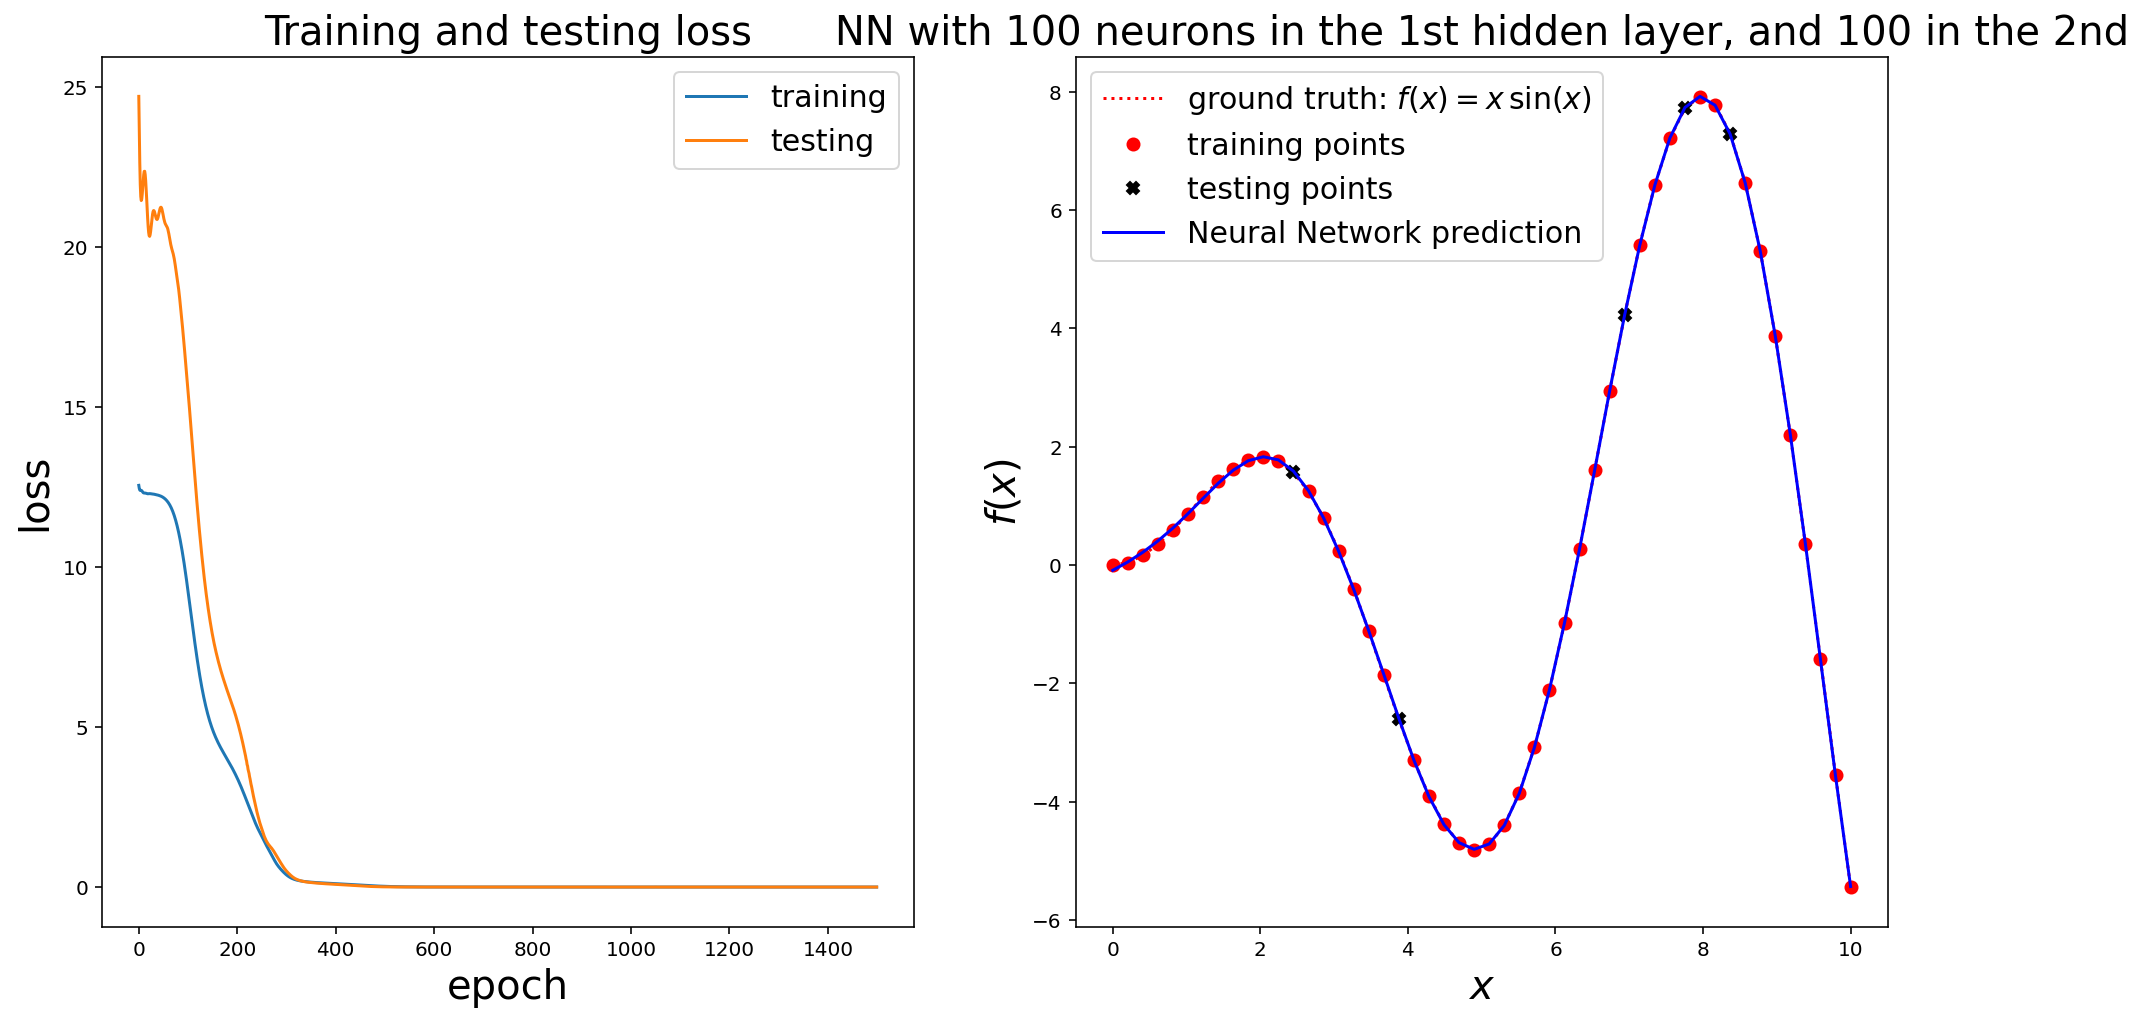

In [25]:
fig_ANN # show figure now.

Not the most amazing model you have ever seen, right?

* Try again but now using 200 neurons for the first hidden layer and 10 for the second hidden layer.
    - spoiler alert: a bit better, but far from amazing...

### See you next class

Have fun!